In [44]:
import os
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier, XGBRFClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from xgboost import XGBClassifier
import lightgbm as lgb
import seaborn as sns
from sklearn.ensemble import *
from catboost import CatBoostClassifier
import numpy as np
import itertools
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [2]:
os.chdir('..')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv('artifacts/data_transformation/train.csv')

In [5]:
df = df.loc[:, ~df.columns.str.startswith('NATURE')]

In [6]:
df.head()

,ACC_NO,MIN_DUE_AMT_1,MIN_DUE_AMT_2,MIN_DUE_AMT_3,MIN_DUE_AMT_4,MIN_DUE_AMT_5,MIN_DUE_AMT_6,OVER_LIMIT_FEE_1,OVER_LIMIT_FEE_2,OVER_LIMIT_FEE_3,OVER_LIMIT_FEE_4,OVER_LIMIT_FEE_5,OVER_LIMIT_FEE_6,TOT_SPEND_AMT_1,TOT_SPEND_AMT_2,TOT_SPEND_AMT_3,TOT_SPEND_AMT_4,TOT_SPEND_AMT_5,TOT_SPEND_AMT_6,PAYMENT_AMT_1,PAYMENT_AMT_2,PAYMENT_AMT_3,PAYMENT_AMT_4,PAYMENT_AMT_5,PAYMENT_AMT_6,TOTAL_OS_1,TOTAL_OS_2,TOTAL_OS_3,TOTAL_OS_4,TOTAL_OS_5,TOTAL_OS_6,LATE_PAY_FEE_1,LATE_PAY_FEE_2,LATE_PAY_FEE_3,LATE_PAY_FEE_4,LATE_PAY_FEE_5,LATE_PAY_FEE_6,A_SCORE_VALUE,FINAL_LIMIT,3_MONTH_NPL_STATUS,AGE,MONTH_END_BAL_LCY,REV_SETT_1_REVOLVER,REV_SETT_1_SETTLER,REV_SETT_2_REVOLVER,REV_SETT_2_SETTLER,REV_SETT_3_REVOLVER,REV_SETT_3_SETTLER,REV_SETT_4_REVOLVER,REV_SETT_4_SETTLER,REV_SETT_5_REVOLVER,REV_SETT_5_SETTLER,REV_SETT_6_REVOLVER,REV_SETT_6_SETTLER,RESTRUCTURED_PLAN_N,RESTRUCTURED_PLAN_Y,ST_GENERAL_ACC_BLCK,ST_GENERAL_ACC_CLST,ST_GENERAL_ACC_DACL,ST_GENERAL_ACC_DCBK,ST_GENERAL_ACC_DLNQ,ST_GENERAL_ACC_DRSP,ST_GENERAL_ACC_NORM,ST_GENERAL_ACC_PCLS,ST_GENERAL_ACC_RCDF,ST_GENERAL_ACC_RCLS,ST_GENERAL_ACC_RCPM,ST_GENERAL_ACC_RCSM,ST_GENERAL_ACC_RCSS,ST_GENERAL_ACC_RSET,ST_GENERAL_ACC_SACC,ST_GENERAL_ACC_SETT,ST_GENERAL_ACC_TERM,ST_GENERAL_ACC_WROF,GENDER_F,GENDER_M,PRODUCT_P13635,PRODUCT_P2f44d,PRODUCT_P3c2a4,PRODUCT_P3dbc4,PRODUCT_P59e14,PRODUCT_P78a55,PRODUCT_P7fc9a,PRODUCT_P8f4b3,PRODUCT_Pacee4,PRODUCT_Pd9c22,PRODUCT_Pdbb26,PRODUCT_Pdc921,PRODUCT_Pf4d80
0,93944.0,542.70,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12896.00,78185.72,16409.23,9008.00,0.00,0.00,3000.0,0.0,42000.0,3000.0,1000.0,2000.0,137387.06,125209.110,46277.59,65720.36,59712.36,60712.36,1750.0,0.0,0.0,0.0,0.0,0.0,194.0,317000.0,0.0,56.0,397.13,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7238.0,7798.39,4076.19,2045.47,1551.43,7527.77,887.62,0.0,0.0,0.0,0.0,0.0,0.0,79873.03,67408.22,165612.27,87593.55,42954.06,179232.44,195000.0,51500.0,52000.0,39000.0,188200.0,22500.0,140000.80,255127.770,232021.77,117428.98,68785.43,213981.38,0.0,0.0,1750.0,0.0,0.0,0.0,217.0,1000000.0,0.0,35.0,0.00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11226.0,0.00,0.00,0.00,0.00,0.00,250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-76.31,-76.310,-76.31,-76.31,-76.31,-76.31,0.0,0.0,0.0,0.0,0.0,0.0,231.0,1037000.0,0.0,55.0,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,94712.0,818.80,650.04,579.68,830.91,577.58,636.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1739.70,0.00,0.00,6314.00,13000.0,20500.0,16300.0,14500.0,20800.0,14500.0,97219.38,110219.375,130469.38,139029.67,153529.69,174329.67,0.0,0.0,0.0,0.0,0.0,0.0,233.0,500000.0,0.0,37.0,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,119466.0,570.24,618.13,602.91,250.00,250.00,250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,42779.00,8278.68,17041.09,2238.00,0.00,15000.0,15500.0,16200.0,5500.0,3500.0,3500.0,97667.70,112667.700,85388.70,93310.02,81768.93,83030.93,0.0,0.0,0.0,0.0,0.0,1750.0,201.0,376000.0,0.0,56.0,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df_1=df.copy()

In [ ]:
'''df_1['OVER_LIMIT_FEE_1']=(df_1['OVER_LIMIT_FEE_1']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_2']=(df_1['OVER_LIMIT_FEE_2']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_3']=(df_1['OVER_LIMIT_FEE_3']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_4']=(df_1['OVER_LIMIT_FEE_4']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_5']=(df_1['OVER_LIMIT_FEE_5']>=1750).astype(int)
df_1['OVER_LIMIT_FEE_6']=(df_1['OVER_LIMIT_FEE_6']>=1750).astype(int)

df_1['LATE_PAY_FEE_1']=(df_1['LATE_PAY_FEE_1']>=1750).astype(int)
df_1['LATE_PAY_FEE_2']=(df_1['LATE_PAY_FEE_2']>=1750).astype(int)
df_1['LATE_PAY_FEE_3']=(df_1['LATE_PAY_FEE_3']>=1750).astype(int)
df_1['LATE_PAY_FEE_4']=(df_1['LATE_PAY_FEE_4']>=1750).astype(int)
df_1['LATE_PAY_FEE_5']=(df_1['LATE_PAY_FEE_5']>=1750).astype(int)
df_1['LATE_PAY_FEE_6']=(df_1['LATE_PAY_FEE_6']>=1750).astype(int)'''

In [ ]:
'''df_1['REV_SETT_1'] = df_1['REV_SETT_1_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_2'] = df_1['REV_SETT_2_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_3'] = df_1['REV_SETT_3_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_4'] = df_1['REV_SETT_4_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_5'] = df_1['REV_SETT_5_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)
df_1['REV_SETT_6'] = df_1['REV_SETT_6_REVOLVER'].apply(lambda x: 1 if x == 1 else 0)

df_1=df_1.drop(columns=['REV_SETT_1_REVOLVER','REV_SETT_2_REVOLVER','REV_SETT_3_REVOLVER','REV_SETT_4_REVOLVER','REV_SETT_5_REVOLVER','REV_SETT_6_REVOLVER',
                        'REV_SETT_1_SETTLER','REV_SETT_2_SETTLER','REV_SETT_3_SETTLER','REV_SETT_4_SETTLER','REV_SETT_5_SETTLER','REV_SETT_6_SETTLER'])
                        '''

In [77]:
df_1['LATE_PAY_FEE']=df_1['LATE_PAY_FEE_1']+df_1['LATE_PAY_FEE_2']+df_1['LATE_PAY_FEE_3']+df_1['LATE_PAY_FEE_4']+df_1['LATE_PAY_FEE_5']+df_1['LATE_PAY_FEE_6']


df_1['OVER_LIMIT_FEE']=df_1['OVER_LIMIT_FEE_1']+df_1['OVER_LIMIT_FEE_2']+df_1['OVER_LIMIT_FEE_3']+df_1['OVER_LIMIT_FEE_4']+df_1['OVER_LIMIT_FEE_5']+df_1['OVER_LIMIT_FEE_6']

In [78]:
df_1=df_1.drop(columns=['LATE_PAY_FEE_1','LATE_PAY_FEE_2','LATE_PAY_FEE_3','LATE_PAY_FEE_4','LATE_PAY_FEE_5','LATE_PAY_FEE_6'])

df_1=df_1.drop(columns=['OVER_LIMIT_FEE_1','OVER_LIMIT_FEE_2','OVER_LIMIT_FEE_3','OVER_LIMIT_FEE_4','OVER_LIMIT_FEE_5','OVER_LIMIT_FEE_6'])

In [79]:
df_2=df_1.copy()

df_2=df_2.drop(columns=['A_SCORE_VALUE'])

In [80]:
df_3=df_2.copy()

df_3['TOTAL_OS']=(df_3['TOTAL_OS_1']+df_3['TOTAL_OS_2']+df_3['TOTAL_OS_3']+df_3['TOTAL_OS_4']+df_3['TOTAL_OS_5']+df_3['TOTAL_OS_6'])/6

df_3=df_3.drop(columns=['TOTAL_OS_1','TOTAL_OS_2','TOTAL_OS_3','TOTAL_OS_4','TOTAL_OS_5','TOTAL_OS_6','PRODUCT_Pdbb26'])

In [81]:
df1=df_3.drop(columns=['ACC_NO'])

In [82]:
x=df1.drop(columns=['3_MONTH_NPL_STATUS'])
y=df1.loc[:,['3_MONTH_NPL_STATUS']]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y,shuffle=True)

In [17]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'scale_pos_weight': 200,
    'learning_rate': 0.05,
    'min_child_weight': 15,
    'verbosity': -1,
    'n_estimators': 1000,
    'seed': 42
}

clf_lgb = lgb.LGBMClassifier(**params)

clf_lgb.fit(X_train,y_train)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(learning_rate=0.05, min_child_weight=15, n_estimators=1000,
               objective='binary', scale_pos_weight=200, seed=42, verbosity=-1)

In [18]:
lgb_pred = clf_lgb.predict(X_test)

In [19]:
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, lgb_pred) * 100))
print('F1: {:.2f}%'.format(f1_score(y_test, lgb_pred) * 100))
print('Precision (Class 1): {:.2f}%'.format(precision_score(y_test, lgb_pred) * 100))
print('Recall (Class 0): {:.2f}%'.format(recall_score(y_test, lgb_pred,pos_label=0) * 100))
print('Recall: {:.2f}%'.format(recall_score(y_test, lgb_pred) * 100))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, lgb_pred) * 100))

AUC: 56.35%
F1: 14.98%
Precision (Class 1): 17.71%
Recall (Class 0): 99.73%
Recall: 12.98%
Accuracy: 99.34%


In [20]:
print(classification_report(y_test,lgb_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29274
         1.0       0.18      0.13      0.15       131

    accuracy                           0.99     29405
   macro avg       0.59      0.56      0.57     29405
weighted avg       0.99      0.99      0.99     29405



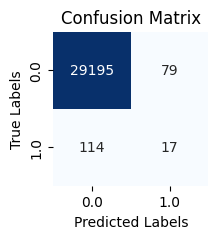

In [21]:

# NORMAL PARAMS & 0.7 THRESHOLD

conf_matrix_xgb = confusion_matrix(y_test,lgb_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=clf_lgb.classes_, yticklabels=clf_lgb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
params

{'boosting_type': 'gbdt',
 'objective': 'binary',
 'scale_pos_weight': 200,
 'learning_rate': 0.05,
 'min_child_weight': 15,
 'verbosity': -1,
 'n_estimators': 1000,
 'seed': 42}

In [26]:
params2 = {
    'boosting_type': ['dart'],
    'objective': ['binary'],
    'scale_pos_weight': [150,100,120,200,250],
    'learning_rate': [0.05],
    'min_child_weight': [15,3,5,7,10,12],
    'num_leaves':[100],
    'max_depth':[14,3,5,7,9,11,17],
    'subsample':[0.5],
    'colsample_bytree':[0.9],
    'verbosity': [-1],
    'n_estimators': [1000],
    'seed': [42]
}

metrics_dict = {
    'AUC':[''],
    'F1':[''],
    'Precision 1':[''],
    'Recall 0':[''],
    'Recall 1':[''],
    'Accuracy':['']
}

In [27]:
keys = params2.keys()
values = params2.values()
metrics_keys=metrics_dict.keys()

# Create the cartesian product of all parameter lists
combinations = itertools.product(*values)

# Loop through each combination, create a dictionary, and print it
for combination in combinations:
    param_dict = dict(zip(keys, combination))
    
    clf_lgb = lgb.LGBMClassifier(**param_dict,)
    clf_lgb.fit(X_train,y_train)
    lgb_pred = clf_lgb.predict(X_test)
    
    metrics_values=('{:.2f}%'.format(roc_auc_score(y_test, lgb_pred) * 100),
    '{:.2f}%'.format(f1_score(y_test, lgb_pred) * 100),
    '{:.2f}%'.format(precision_score(y_test, lgb_pred) * 100),
    '{:.2f}%'.format(recall_score(y_test, lgb_pred,pos_label=0) * 100),
    '{:.2f}%'.format(recall_score(y_test, lgb_pred) * 100),
    '{:.2f}%'.format(accuracy_score(y_test, lgb_pred) * 100))
    
    metrics_final_dict = dict(zip(metrics_keys, metrics_values))
    
    final_dict = {**param_dict,**metrics_final_dict}
    
    del final_dict['verbosity']
    del final_dict['objective']
    del final_dict['seed']
    
    results=pd.DataFrame([final_dict])
    
    results.to_csv('LGB_results_1.csv',index=True, mode='a', header=False)
    #results.to_csv('LGB_results_1.csv',index=True, header=True)
    
    #break

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\p

KeyboardInterrupt: 

In [29]:
final_dict

{'boosting_type': 'gbdt',
 'objective': 'binary',
 'scale_pos_weight': 200,
 'learning_rate': 0.05,
 'min_child_weight': 17,
 'num_leaves': 10,
 'max_depth': 3,
 'subsample': 0.5,
 'colsample_bytree': 0.5,
 'verbosity': -1,
 'n_estimators': 1000,
 'seed': 42,
 'AUC': '72.16%',
 'F1': '9.70%',
 'Precision 1': '5.39%',
 'Recall 0': '96.23%',
 'Recall 1': '48.09%',
 'Accuracy': '96.01%'}

In [84]:
params_check = {
    'boosting_type': 'dart',
    'objective': 'binary',
    'scale_pos_weight': 150,
    'learning_rate': 0.05,
    'min_child_weight': 15,
    'num_leaves':75,
    'max_depth':10,
    'subsample':0.5,
    'colsample_bytree':0.9,
    'verbosity': -1,
    'n_estimators': 1000,
    'seed': 42
}

In [85]:
clf_lgb = lgb.LGBMClassifier(**params_check)

clf_lgb.fit(X_train,y_train)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(boosting_type='dart', colsample_bytree=0.9, learning_rate=0.05,
               max_depth=10, min_child_weight=15, n_estimators=1000,
               num_leaves=75, objective='binary', scale_pos_weight=150, seed=42,
               subsample=0.5, verbosity=-1)

In [107]:
lgb_pred = clf_lgb.predict(X_test)
lgb_pred_prob = clf_lgb.predict_proba(X_test)

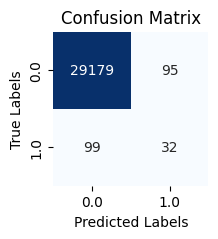

In [108]:

# NORMAL PARAMS & 0.7 THRESHOLD

conf_matrix_xgb = confusion_matrix(y_test,lgb_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=clf_lgb.classes_, yticklabels=clf_lgb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [109]:
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, lgb_pred) * 100))
print('F1: {:.2f}%'.format(f1_score(y_test, lgb_pred) * 100))
print('Precision (Class 1): {:.2f}%'.format(precision_score(y_test, lgb_pred) * 100))
print('Recall (Class 0): {:.2f}%'.format(recall_score(y_test, lgb_pred,pos_label=0) * 100))
print('Recall: {:.2f}%'.format(recall_score(y_test, lgb_pred) * 100))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, lgb_pred) * 100))

AUC: 62.05%
F1: 24.81%
Precision (Class 1): 25.20%
Recall (Class 0): 99.68%
Recall: 24.43%
Accuracy: 99.34%


In [115]:
lgb_ta=(lgb_pred_prob[:,1]>=0.4).astype(int)


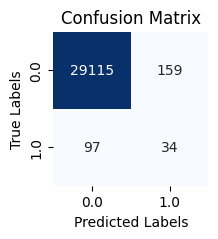

In [116]:

# NORMAL PARAMS & 0.7 THRESHOLD

conf_matrix_xgb = confusion_matrix(y_test,lgb_ta)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=clf_lgb.classes_, yticklabels=clf_lgb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [117]:
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, lgb_ta) * 100))
print('F1: {:.2f}%'.format(f1_score(y_test, lgb_ta) * 100))
print('Precision (Class 1): {:.2f}%'.format(precision_score(y_test, lgb_ta) * 100))
print('Recall (Class 0): {:.2f}%'.format(recall_score(y_test, lgb_ta,pos_label=0) * 100))
print('Recall: {:.2f}%'.format(recall_score(y_test, lgb_ta) * 100))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, lgb_ta) * 100))

AUC: 62.71%
F1: 20.99%
Precision (Class 1): 17.62%
Recall (Class 0): 99.46%
Recall: 25.95%
Accuracy: 99.13%


In [86]:
clf_lgb_2=lgb.LGBMClassifier()

In [87]:
random_search=RandomizedSearchCV(clf_lgb_2,param_distributions=params2,n_iter=5,scoring='f1',cv=5)

In [88]:
random_search.fit(X_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\p

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=5,
                   param_distributions={'boosting_type': ['dart'],
                                        'colsample_bytree': [0.9],
                                        'learning_rate': [0.05],
                                        'max_depth': [14, 3, 5, 7, 9, 11, 17],
                                        'min_child_weight': [15, 3, 5, 7, 10,
                                                             12],
                                        'n_estimators': [1000],
                                        'num_leaves': [100],
                                        'objective': ['binary'],
                                        'scale_pos_weight': [150, 100, 120, 200,
                                                             250],
                                        'seed': [42], 'subsample': [0.5],
                                        'verbosity': [-1]},
                   scoring='f1')

In [89]:
random_params=random_search.best_params_

In [90]:
clf_lgb_3=lgb.LGBMClassifier(**random_params)

In [91]:
clf_lgb_3.fit(X_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(boosting_type='dart', colsample_bytree=0.9, learning_rate=0.05,
               max_depth=14, min_child_weight=12, n_estimators=1000,
               num_leaves=100, objective='binary', scale_pos_weight=200,
               seed=42, subsample=0.5, verbosity=-1)

In [92]:
y_pred_rand=clf_lgb_3.predict(X_test)

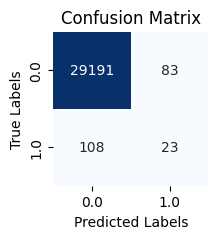

In [93]:
# NORMAL PARAMS & 0.7 THRESHOLD

conf_matrix_xgb = confusion_matrix(y_test,y_pred_rand)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=clf_lgb_3.classes_, yticklabels=clf_lgb_3.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [94]:
print('F1: {:.2f}%'.format(f1_score(y_test, y_pred_rand) * 100))

F1: 19.41%


In [95]:
search_space = {
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(3, 12),
    'num_leaves': Integer(20, 100),
    'min_child_samples': Integer(5, 50),
    'subsample': Real(0.5, 1.0, prior='uniform'),
    'colsample_bytree': Real(0.3, 1.0, prior='uniform'),
    'reg_alpha': Real(0, 1.0, prior='uniform'),
    'reg_lambda': Real(0, 1.0, prior='uniform'),
    'scale_pos_weight': Real(1, 400, prior='uniform'),
    
    # Added scale_pos_weight to the search space
}

In [96]:
lgb_skopt=lgb.LGBMClassifier(boosting_type='dart')

In [97]:
opt = BayesSearchCV(
    lgb_skopt,
    search_space,
    n_iter=50,  # Number of iterations to perform
    cv=3,  # Cross-validation splits
    #n_jobs=-1,  # Use all processors
    verbose=False,
    scoring='f1',  # Use F1 score as the evaluation metric
)

# Fit the model to the training data
opt.fit(X_train, y_train)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\p

BayesSearchCV(cv=3, estimator=LGBMClassifier(boosting_type='dart'),
              scoring='f1',
              search_spaces={'colsample_bytree': Real(low=0.3, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.2, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=12, prior='uniform', transform='normalize'),
                             'min_child_samples': Integ...
                             'num_leaves': Integer(low=20, high=100, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0, high=1.0, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=0, high=1.0, prior='uniform', transform='normalize'),
                             'scale_pos_weight': Real(low=1, high=400, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=False)

In [98]:
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"Test F1 score: {f1:.4f}")

Test F1 score: 0.1882


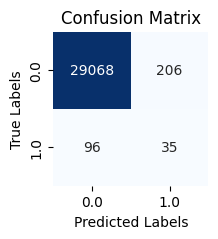

In [99]:
# NORMAL PARAMS & 0.7 THRESHOLD

conf_matrix_xgb = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=clf_lgb_3.classes_, yticklabels=clf_lgb_3.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [100]:
opt.best_params_

OrderedDict([('colsample_bytree', 0.3),
             ('learning_rate', 0.015887429904270577),
             ('max_depth', 12),
             ('min_child_samples', 32),
             ('n_estimators', 500),
             ('num_leaves', 70),
             ('reg_alpha', 0.46356603876624536),
             ('reg_lambda', 0.8352147609460338),
             ('scale_pos_weight', 47.238719983992354),
             ('subsample', 0.6356787005107585)])